In [1]:
#Download dataset from: https://drive.google.com/file/d/1nmobeX9BQMLGLnI4Fn_dPlCqqUwjYBLX/view?usp=sharing
!gdown --id 1nmobeX9BQMLGLnI4Fn_dPlCqqUwjYBLX
!unzip 1_prewitt.zip -d ./prewitt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nmobeX9BQMLGLnI4Fn_dPlCqqUwjYBLX
To: /content/1_prewitt.zip
100% 380k/380k [00:00<00:00, 98.1MB/s]
Archive:  1_prewitt.zip
  inflating: ./prewitt/circlegrey.png  
  inflating: ./prewitt/circlegrey.tif  
 extracting: ./prewitt/julia.png     
  inflating: ./prewitt/julia.tif     
  inflating: ./prewitt/motor.png     
  inflating: ./prewitt/motor.tif     


In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import skimage.exposure

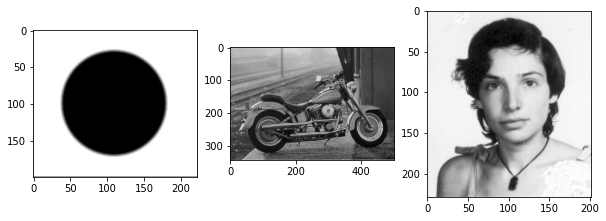

In [57]:
file = '/content/prewitt/*.png' 
glob.glob(file)
images = [cv2.imread(image) for image in glob.glob(file)]

fig=plt.figure(figsize=(10, 10))
rows, cols = 1, 3
# Display all of images
for j in range(0, len(images)):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images[j])
plt.show()

Text(0.5, 1.0, 'Magnitude')

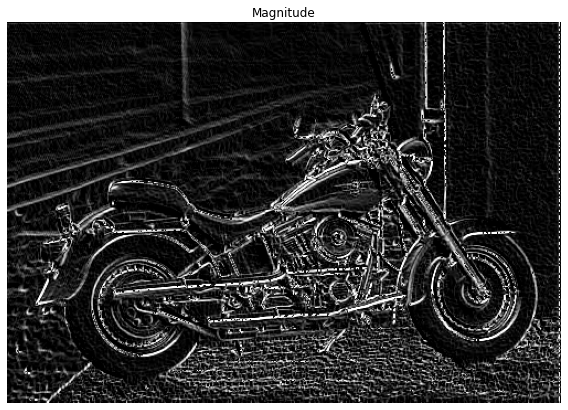

In [58]:
img1 = cv2.imread('/content/prewitt/motor.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#prewitt
kernelx1 = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx1 = cv2.filter2D(gray1, -1, kernelx1)
img_prewitty1 = cv2.filter2D(gray1, -1, kernely1)
magnitude1 = img_prewittx1 + img_prewitty1

orientation1 = np.arctan2(img_prewitty1, img_prewittx1)
orientation1 = skimage.exposure.rescale_intensity(orientation1, in_range='image', out_range=(0,255)).astype(np.uint8)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(magnitude1, cmap="gray")
plt.axis('off')
plt.title("Magnitude")

Text(0.5, 1.0, 'Magnitude')

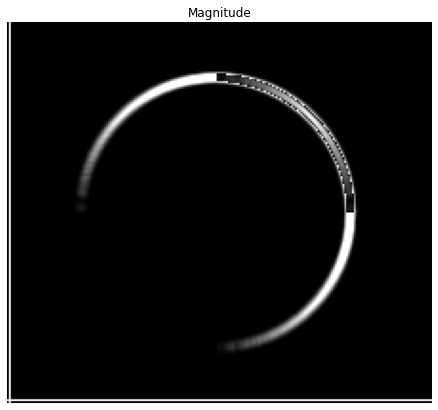

In [59]:
img2 = cv2.imread('/content/prewitt/circlegrey.png')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#prewitt
kernelx2 = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx2 = cv2.filter2D(gray2, -1, kernelx2)
img_prewitty2 = cv2.filter2D(gray2, -1, kernely2)
magnitude2 = img_prewittx2 + img_prewitty2

orientation2 = np.arctan2(img_prewitty2, img_prewittx2)
orientation2 = skimage.exposure.rescale_intensity(orientation2, in_range='image', out_range=(0,255)).astype(np.uint8)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(magnitude2, cmap="gray")
plt.axis('off')
plt.title("Magnitude")

Text(0.5, 1.0, 'Magnitude')

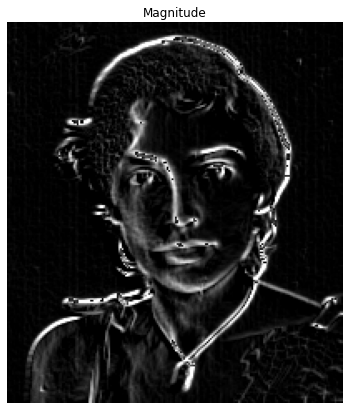

In [60]:
img3 = cv2.imread('/content/prewitt/julia.png')
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

#prewitt
kernelx3 = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely3 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx3 = cv2.filter2D(gray3, -1, kernelx3)
img_prewitty3 = cv2.filter2D(gray3, -1, kernely3)
magnitude3 = img_prewittx3 + img_prewitty3

orientation3 = np.arctan2(img_prewitty3, img_prewittx3)
orientation3 = skimage.exposure.rescale_intensity(orientation3, in_range='image', out_range=(0,255)).astype(np.uint8)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 1

# fig.add_subplot(rows, columns, 1)
# plt.imshow(img_gaussian3)
# plt.axis('off')
# plt.title("Gaussian Blur")

fig.add_subplot(rows, columns, 1)
plt.imshow(magnitude3, cmap="gray")
plt.axis('off')
plt.title("Magnitude")
  

# fig.add_subplot(rows, columns, 3)
# plt.imshow(orientation3)
# plt.axis('off')
# plt.title("Orientation")

In [61]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

Text(0.5, 1.0, 'NMS')

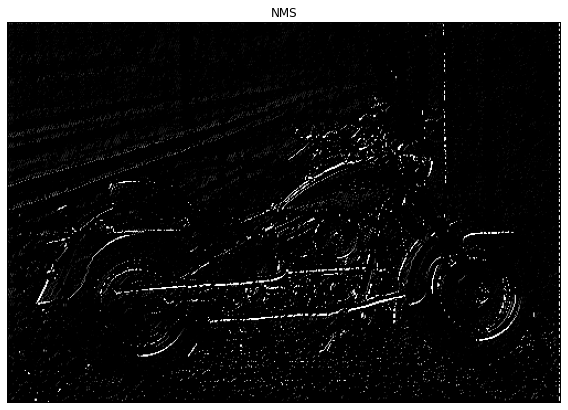

In [62]:
nms1 = non_max_suppression(magnitude1, orientation1)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(nms1, cmap="gray")
plt.axis('off')
plt.title("NMS")

Text(0.5, 1.0, 'NMS')

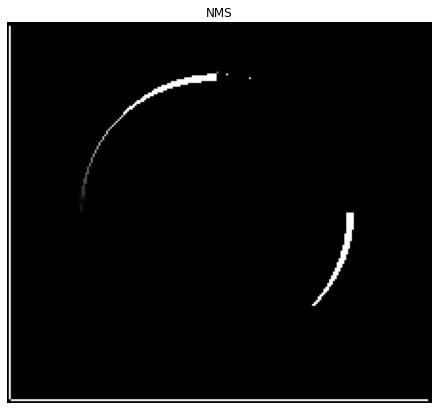

In [63]:
nms2 = non_max_suppression(magnitude2, orientation2)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(nms2, cmap="gray")
plt.axis('off')
plt.title("NMS")

Text(0.5, 1.0, 'NMS')

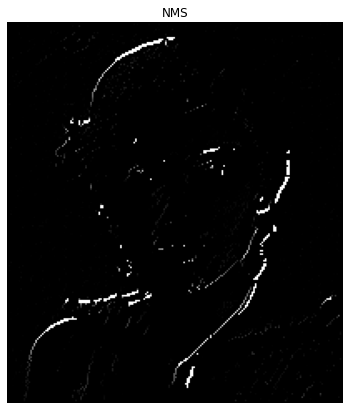

In [64]:
nms3 = non_max_suppression(magnitude3, orientation3)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(nms3, cmap="gray")
plt.axis('off')
plt.title("NMS")